## Задание:

Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Описание датасета:
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Указание пути к данным и загрузка данных

In [3]:
TRAIN_DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'

df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

### Объединим тренировочный и тестовые DataFrame и выпоним предварительную обработку данных

In [7]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             15000 non-null  int64  
 1   DistrictId     15000 non-null  int64  
 2   Rooms          15000 non-null  float64
 3   Square         15000 non-null  float64
 4   LifeSquare     11846 non-null  float64
 5   KitchenSquare  15000 non-null  float64
 6   Floor          15000 non-null  int64  
 7   HouseFloor     15000 non-null  float64
 8   HouseYear      15000 non-null  int64  
 9   Ecology_1      15000 non-null  float64
 10  Ecology_2      15000 non-null  object 
 11  Ecology_3      15000 non-null  object 
 12  Social_1       15000 non-null  int64  
 13  Social_2       15000 non-null  int64  
 14  Social_3       15000 non-null  int64  
 15  Healthcare_1   7825 non-null   float64
 16  Helthcare_2    15000 non-null  int64  
 17  Shops_1        15000 non-null  int64  
 18  Shops_

Для дальнейшей работы с DataFrame необходимо выполнить приведение типов.

In [9]:
df['Id'] = df['Id'].astype(str)
df['DistrictId'] = df['DistrictId'].astype(str)

df['Ecology_2'] = pd.get_dummies(df['Ecology_2'])
df['Ecology_3'] = pd.get_dummies(df['Ecology_3'])
df['Shops_2'] = pd.get_dummies(df['Shops_2'])

### Обработка выбросов и некорректных значений

In [10]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,15000.000000,15000.000000,11846.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000,15000.000000,10000.000000
mean,1.897000,56.360350,36.851792,6.174467,8.561800,12.606600,3.321575e+03,0.119196,0.009667,0.028267,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133,0.082467,214138.857399
std,0.839229,20.423913,71.120183,24.016979,5.323113,6.780165,1.637078e+05,0.119371,0.097846,0.165739,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545,0.275084,92872.293865
min,0.000000,1.136859,0.333490,0.000000,1.000000,0.000000,1.908000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.814371,22.896130,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,2.000000,52.645757,32.822810,6.000000,7.000000,12.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,2.000000,66.036608,45.144624,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,78.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


Рассмотрим выбросы по колонке - __общая площадь__.
Будем исходить из предположения, что у нас нет квартир с общей площадью менее 10 кв.м

In [11]:
mask = df.Square < 10
df[mask].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,0,0,43,8429,3,NaN,3,9,0,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,0,0,4,915,0,NaN,0,0,0,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,0,0,5,1564,0,540.0,0,0,0,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,0,0,9,1892,0,NaN,0,1,0,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,0,0,16,3433,4,2643.0,4,5,0,369472.403061


Как видно выше, у нас имеются квартиры у которых жилая площадь более 10 кв.м, но при этом общая площадь менее 10 кв.м, и квартиры где два этих показателя менее 10 кв.м.
Исправим эту ситуацию, умножив площадь на 10.

In [12]:
mask = (df.Square < 10) & (df.LifeSquare > 10)
df[mask]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,0,0,43,8429,3,NaN,3,9,0,412511.088764
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,0,0,9,1892,0,NaN,0,1,0,97560.720383
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,0,0,1,264,0,NaN,0,1,0,237716.681261
14713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,0,0,5,1564,0,540.0,0,0,0,NaN


In [13]:
df.loc[mask, 'Square'] = df.loc[mask, 'Square'] * 10

In [14]:
mask = df.Square < 10
df.loc[mask, ['Square', 'LifeSquare']] = df.loc[mask, ['Square', 'LifeSquare']] * 10

In [15]:
mask = (df.Square > 250) & (df.Price < 300000)
df.loc[mask, 'Square'] = df.loc[mask, 'Square'] / 10

In [16]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,15000.000000,15000.000000,11846.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000,15000.000000,10000.000000
mean,1.897000,56.303877,36.893180,6.174467,8.561800,12.606600,3.321575e+03,0.119196,0.009667,0.028267,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133,0.082467,214138.857399
std,0.839229,19.055865,71.111839,24.016979,5.323113,6.780165,1.637078e+05,0.119371,0.097846,0.165739,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545,0.275084,92872.293865
min,0.000000,11.368588,0.333490,0.000000,1.000000,0.000000,1.908000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.834642,22.915886,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,2.000000,52.649790,32.838647,6.000000,7.000000,12.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,2.000000,66.016402,45.159819,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,19.000000,275.645284,7480.592129,2014.000000,78.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


Проверим правдоподобность максимального количества комнат, исходя из наблюдений средних значений в районе.

In [17]:
df.loc[df.Rooms > 5, ['Rooms', 'Square', 'LifeSquare']]

,Rooms,Square,LifeSquare
377,10.0,59.056975,36.223072
1454,19.0,42.006046,21.779288
2170,6.0,59.414334,38.702244
8849,10.0,60.871266,38.420681
12071,6.0,110.750226,NaN
13217,6.0,223.453689,104.113552
13398,17.0,52.866107,32.528342


Определим среднее значение общей площади квартиры для количества комнат от 1 до 5
Изменим количество комнат в выбрасах, используя полученные значения

In [18]:
dict_room = {i : df.loc[df.Rooms == i, 'Square'].mean() for i in range(1,6)}
dict_room

{1: 41.21764082766785,
 2: 56.57726160641935,
 3: 77.0263610865448,
 4: 96.9239764814709,
 5: 120.70366961074009}

In [19]:
def modify_room(list_el):
    list_el = list_el.index.tolist()
    new_rooms = []
    for el in list_el:
        mod_rooms = { round(abs(dict_room[key] - df.loc[el, 'Square']),4):key for key in dict_room.keys()}
        new_rooms.append(mod_rooms[min(mod_rooms)])
    return new_rooms

In [20]:
mask = (df.Rooms > 5) | ((df.Rooms == 5) & (df.Square < 60)) | (df.Rooms == 0)
df.loc[mask, 'Rooms'] = modify_room(df[mask])

Проверим корректность столбца __'HouseYear'__ (год постройки дома)

In [21]:
df['HouseYear'].sort_values()

13253        1908
10002        1909
9317         1910
12691        1910
10064        1911
           ...   
790          2020
14389        2020
4376         2020
4189         4968
1497     20052011
Name: HouseYear, Length: 15000, dtype: int64

In [22]:
df.loc[df['HouseYear'] == 20052011, ['HouseYear']] = 2005
df.loc[df['HouseYear'] == 4968, ['HouseYear']] = 1968

Проверим корректность столбцов __Floor__ и __HouseFloor__

In [23]:
df['HouseFloor'].sort_values()
df[df['HouseFloor'] > 48]
df[(df['HouseYear'] == 1977)].groupby('HouseFloor').count()['HouseYear']
df.loc[df['HouseFloor'] == 117, ['HouseFloor']] = 17
df.loc[df['HouseFloor'] == 99, ['HouseFloor']] = 9

In [24]:
hy = df[df['HouseFloor'] == 0].groupby('HouseYear').count()['Id']
dict_housefloor_year = {el: df[df.HouseYear == el]['HouseFloor'].unique() for el in hy.index}
dict_housefloor_year

{1977: array([17.,  0.,  4.,  1., 15., 12.,  9.,  3., 24.,  5., 20., 25., 22.,
        10., 14., 19., 11.,  2., 16., 21., 18.,  7.,  6.,  8., 40., 13.,
        30., 23., 31.]),
 1979: array([ 9., 12., 16., 22., 17., 25., 14., 13.,  5.,  0.]),
 1998: array([ 7., 17., 14., 16., 10.,  9., 22., 12.,  3.,  8., 25., 11.,  0.,
         6.]),
 2013: array([17., 40.,  1., 12., 25., 14., 22., 30., 20., 21., 16., 15., 19.,
         3.,  5., 29., 18.,  9., 23., 26., 31.,  2., 28., 24.,  0.,  7.,
        11., 10.]),
 2014: array([17.,  9., 12.,  1., 14., 16.,  3., 27., 30., 20.,  4., 25.,  5.,
        19., 15.,  2., 13., 22.,  6., 18., 24., 37., 10., 40.,  8., 11.,
         0., 21.]),
 2015: array([14.,  9., 17.,  1.,  4., 15., 25., 16., 10., 22.,  3., 19.,  8.,
        13., 24., 12.,  0., 30., 11., 21., 18., 20., 23.,  2., 27.,  6.,
         7., 40.,  5., 33., 37.]),
 2016: array([22., 17.,  1., 16.,  2., 13., 15., 20., 12., 45.,  7., 25.,  9.,
        14.,  3., 19., 48.,  4., 24.,  0., 18., 21., 

In [25]:
for year in dict_housefloor_year.keys():
    mask = (df.HouseFloor == 0) & (df.HouseYear == year)
    df.loc[mask,'HouseFloor'] = df.loc[mask, 'Floor'].apply(
    lambda x: np.random.choice([el for el in dict_housefloor_year[year] if el >= x]))


In [26]:
df.query('Floor > 30') 
df.loc[df['Floor'] == 78, 'Floor'] = np.random.randint(1, df.loc[df['Floor'] == 78, 'HouseFloor'])

mask = df['Floor'] > df['HouseFloor']
df.loc[mask,'Floor'], df.loc[mask,'HouseFloor'] = df[mask]['HouseFloor'], df[mask]['Floor']

Обработка параметров __LifeSquare, KitchenSquare__

In [27]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,15000.000000,15000.000000,11846.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000,15000.000000,10000.000000
mean,1.894600,56.303877,36.893180,6.174467,7.989133,13.689933,1984.708000,0.119196,0.009667,0.028267,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133,0.082467,214138.857399
std,0.810638,19.055865,71.111839,24.016979,5.279136,6.092082,18.466279,0.119371,0.097846,0.165739,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545,0.275084,92872.293865
min,1.000000,11.368588,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.834642,22.915886,1.000000,4.000000,9.000000,1974.000000,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,2.000000,52.649790,32.838647,6.000000,7.000000,14.000000,1977.000000,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,2.000000,66.016402,45.159819,9.000000,11.000000,17.000000,2001.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,5.000000,275.645284,7480.592129,2014.000000,46.000000,48.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [28]:
df.query('LifeSquare < 1')
df.loc[df.LifeSquare < 1, 'LifeSquare'] = df[df.LifeSquare < 1]['LifeSquare'] * 100

df.query('LifeSquare < 10')
df.loc[df.LifeSquare < 10, 'LifeSquare'] = df[df.LifeSquare < 10]['LifeSquare'] * 10

df.query('LifeSquare  > 150')
df.loc[df.LifeSquare > 1000, 'LifeSquare'] = df[df.LifeSquare > 1000]['LifeSquare'] / 100

mask = (df.Square < 100) & (df.LifeSquare > 100) & ((df.LifeSquare - df.Square)/df.LifeSquare > 0.5 )
df.loc[mask,'LifeSquare'] = df[mask]['LifeSquare'] / 10

mask = (df.LifeSquare - df.Square)/df.LifeSquare > 0.5
df.loc[mask & (df.LifeSquare > 80), 'LifeSquare'] = df.loc[mask & (df.LifeSquare > 80), 'LifeSquare'] / 10

mask = df.LifeSquare > df.Square
df.loc[mask, 'Square'], df.loc[mask, 'LifeSquare'] = df[mask]['LifeSquare'], df[mask]['Square']

Обнулим площадь __KitchenSquare__ для некорректно больших значений с последующей обработкой нулевых значений.

In [29]:
df['another_square'] = df.Square - df.LifeSquare - df.KitchenSquare
df[['Rooms','Square','LifeSquare','KitchenSquare','another_square']].describe()

,Rooms,Square,LifeSquare,KitchenSquare,another_square
count,15000.000000,15000.000000,11846.000000,15000.000000,11846.000000
mean,1.894600,56.424912,36.744077,6.174467,11.231094
std,0.810638,19.050357,16.802771,24.016979,28.443311
min,1.000000,13.305531,8.731467,0.000000,-2013.347241
25%,1.000000,41.949779,23.375991,1.000000,7.391416
50%,2.000000,52.817133,33.139808,6.000000,11.317568
75%,2.000000,66.151908,45.304844,9.000000,15.595831
max,5.000000,275.645284,233.949309,2014.000000,103.340136


In [30]:
mask = (df.KitchenSquare > 20) & (df.another_square < 0) & (df.Square < 120)
df.loc[mask, 'KitchenSquare'] = 0

mask = (df.another_square < 0) & (df.KitchenSquare > 2) & (df.KitchenSquare < 20) & (df.Square < 20)
df.loc[mask & (df.Rooms == 3), ['Rooms']] = 1 
df.loc[mask, 'KitchenSquare'] = 0

mask = (df.another_square < 0) & (df.KitchenSquare > 20)
df.loc[df['KitchenSquare']== 123, 'KitchenSquare'] = 23

In [31]:
mask = (df.KitchenSquare == 0) & (df.another_square > 0)
df.loc[mask, 'another_square'] = 0

Определим средние значения __another_square__ для недвижимости с разным количеством комнат и используем эти значения для редактирования __KitchenSquare__ равных нулю.

In [32]:
mask = ((df.another_square < 2) | (df.another_square.isnull())) & (df.Square < 20)
df.loc[mask, 'another_square'] = np.random.randint(2,5)

mask = df.another_square > 2
a_sq = df[mask].groupby('Rooms').median()['another_square'].to_dict()
a_sq

{1.0: 9.796212452628986,
 2.0: 12.377532941986994,
 3.0: 17.797003502701614,
 4.0: 22.587430810409522,
 5.0: 23.62691222547827}

In [33]:
mask = df.KitchenSquare > 2
k_sq = df[mask].groupby('Rooms').mean()['KitchenSquare'].to_dict()
k_sq

{1.0: 7.819931074095347,
 2.0: 7.694410544300708,
 3.0: 8.533577533577533,
 4.0: 9.397129186602871,
 5.0: 13.263157894736842}

In [34]:
mask = (df.KitchenSquare < 2) & (df.Square > 25)

df.loc[mask, 'KitchenSquare'] = df.loc[mask, 'Rooms'].map(k_sq)
df['another_square'] = df.Square - df.LifeSquare - df.KitchenSquare
mask = df.another_square > 30
df.loc[mask, 'another_square'] = 0

In [35]:
mask = (df.another_square < 2) | (df.another_square.isnull())

df.loc[mask, 'another_square'] = df.loc[mask, 'Rooms'].map(a_sq)

### Обработка пропусков

In [36]:
len(df) - df.count()

Id                   0
DistrictId           0
Rooms                0
Square               0
LifeSquare        3154
KitchenSquare        0
Floor                0
HouseFloor           0
HouseYear            0
Ecology_1            0
Ecology_2            0
Ecology_3            0
Social_1             0
Social_2             0
Social_3             0
Healthcare_1      7175
Helthcare_2          0
Shops_1              0
Shops_2              0
Price             5000
another_square       0
dtype: int64

Расчитаем значение __LifeSquare__ на основе скорректированных значений __Square, KitchenSquare и another_square__

In [37]:
mask = ((df.Square - df.LifeSquare - df.KitchenSquare - df.another_square) < 0) | (df.LifeSquare.isnull())

df.loc[mask, 'LifeSquare'] = df.Square - df.KitchenSquare - df.another_square

Рассчитаем значения __Healthcare_1__. Часть значений заполним по существующим данным внутри одного __DistrictId__, остальные заполним медианой всей выборки.

In [38]:
mask = df.Healthcare_1.notnull()

gr_h1 = df[mask].groupby('DistrictId')['Healthcare_1'].mean().to_dict()

In [39]:
mask = df['Healthcare_1'].isnull()

df.loc[mask, 'Healthcare_1'] = df.loc[mask, 'DistrictId'].map(gr_h1)
df.loc[mask, 'Healthcare_1'] = df[df['Healthcare_1'].notnull()]['Healthcare_1'].median()

Добавим признак - цена за квадратный метр по __DistrictId и HouseYear__

In [40]:
mask = df.Price > 0
df['Price_Meter'] = df.loc[mask, 'Price'] / df.loc[mask, 'Square']
df[mask].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,another_square,Price_Meter
0,14038,35,2.0,47.981561,29.442751,6.000000,7.0,9.0,1969,0.089040,...,33,7976,5,800.0,0,11,0,184966.930730,12.538811,3854.958571
1,15053,41,3.0,65.683640,40.049543,8.000000,7.0,9.0,1978,0.000070,...,46,10309,1,240.0,1,16,0,300009.450063,17.634097,4567.491245
2,4765,53,2.0,44.947953,29.197612,7.694411,8.0,12.0,1968,0.049637,...,34,7759,0,229.0,1,3,0,220925.908524,8.055931,4915.149522
3,5809,58,2.0,53.352981,31.975448,9.000000,8.0,17.0,1977,0.437885,...,23,5735,3,1084.0,0,5,0,175616.227217,12.377533,3291.591637
4,10783,99,1.0,39.649192,23.776169,7.000000,11.0,12.0,1976,0.012339,...,35,5776,1,2078.0,2,4,0,150226.531644,8.873023,3788.892642


In [41]:
med_price_by_district = df[mask].groupby(['DistrictId', 'HouseYear'])\
                        .agg({'Price_Meter':'median'})\
                        .rename(columns={'Price_Meter':'MedPriceByDistrict'})

df = df.merge(med_price_by_district, on=['DistrictId', 'HouseYear'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,another_square,Price_Meter,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.000000,7.0,9.0,1969,0.089040,...,7976,5,800.0,0,11,0,184966.930730,12.538811,3854.958571,4481.748059
1,15053,41,3.0,65.683640,40.049543,8.000000,7.0,9.0,1978,0.000070,...,10309,1,240.0,1,16,0,300009.450063,17.634097,4567.491245,4567.491245
2,4765,53,2.0,44.947953,29.197612,7.694411,8.0,12.0,1968,0.049637,...,7759,0,229.0,1,3,0,220925.908524,8.055931,4915.149522,4924.248935
3,5809,58,2.0,53.352981,31.975448,9.000000,8.0,17.0,1977,0.437885,...,5735,3,1084.0,0,5,0,175616.227217,12.377533,3291.591637,2351.565816
4,10783,99,1.0,39.649192,23.776169,7.000000,11.0,12.0,1976,0.012339,...,5776,1,2078.0,2,4,0,150226.531644,8.873023,3788.892642,4044.061796


In [42]:
mask = df['MedPriceByDistrict'].notnull()
gr_MedPrice = df[mask].groupby('DistrictId')['MedPriceByDistrict'].mean().to_dict()

In [43]:
mask = df['MedPriceByDistrict'].isnull()

df.loc[mask, 'MedPriceByDistrict'] = df.loc[mask, 'DistrictId'].map(gr_MedPrice)
df.loc[mask, 'MedPriceByDistrict'] = df['MedPriceByDistrict'].median()
df = df.drop('Price_Meter', axis = 1)

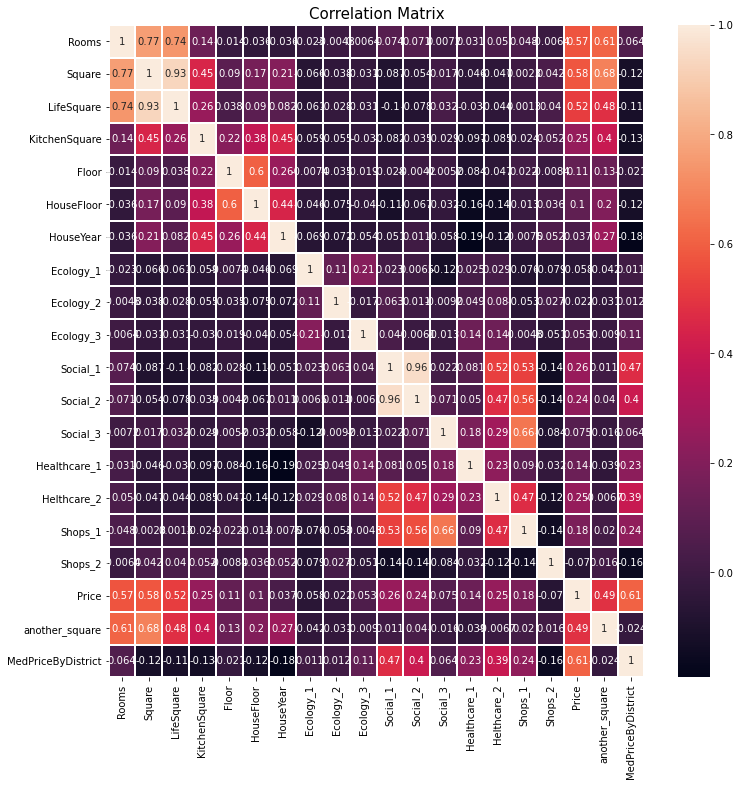

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr_matrix = df.corr()

fig, axes = plt.subplots(1, 1, figsize=(12, 12))
axes.set_title("Correlation Matrix", fontsize=15)
sns.heatmap(corr_matrix, annot=True, linewidths=1)

### Обучение с учителем

Для начала разделим DataFrame на обучающую и тестовую выборки, после чего выполним разбиение обучающих данных на тренировочную и валидационную выборку.

In [45]:
X = pd.DataFrame(df[df['Price'].notnull()])
y = pd.DataFrame(X['Price'])

X = X.drop('Id', axis = 1)
X = X.drop('DistrictId', axis = 1)
X = X.drop('Price', axis = 1)

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape

(7500, 19)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2

In [48]:
rf_model = RandomForestRegressor(max_depth=7, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=42)

In [49]:
y_train_preds = rf_model.predict(X_train)
y_valid_preds = rf_model.predict(X_valid)

In [50]:
y_valid_preds
r2(y_train['Price'],y_train_preds.flatten())

0.9046077448963541

In [51]:
check_test = pd.DataFrame({
    "y_valid": y_valid['Price'],
    "y_valid_preds": y_valid_preds.flatten(),
})

r2(y_valid['Price'],y_valid_preds.flatten())

0.8625115382860642

In [52]:
X_test = df[df['Price'].isnull()]
y_test = pd.DataFrame( X_test.Id, columns = ['Id'])

In [53]:
X_test = X_test.drop('Id', axis = 1)
X_test = X_test.drop('DistrictId', axis = 1)
X_test = X_test.drop('Price', axis = 1)
X_test = X_test.reset_index(drop=True)

y_test['Price'] = rf_model.predict(X_test)
y_test.head()

,Id,Price
10000,725,167499.685123
10001,15856,215196.557817
10002,5480,125414.466752
10003,15664,271879.728989
10004,14275,134086.410380


In [54]:
y_test.to_csv('EIKuznetsova_predictions.csv', index=None)